In [1]:
#import librarys
import pandas as pd
import numpy as np

In [2]:
#import data csv of states into pandas dataframe
data_sync = pd.read_csv("data/extraFiles/Training/Evyatar Cohen/Evyatar636771053639929594Sync.csv")
data_alone = pd.read_csv("data/extraFiles/Training/Evyatar Cohen/Evyatar636771054555711409Alone.csv")
data_spontan = pd.read_csv("data/extraFiles/Training/Evyatar Cohen/Evyatar636771052727603804Spontan.csv")
data_sync

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,427.2310,139071,right,2,69.65445,209.9525,-18.54797,-65.047080,338.263100,-102.57630,...,-0.763543,112.1363,162.7645,10.928120,275.1779,-7.356547,87.30630,0.0,0.059833,0.0
1,427.2310,139071,left,2,-87.18215,204.5752,-40.50642,171.174600,247.945300,-96.48488,...,1.220096,-137.3886,158.1433,-27.829490,-261.8767,-47.873840,30.62584,0.0,0.000000,0.0
2,427.2483,139073,right,2,68.97833,215.1191,-20.12599,-44.440450,302.917000,-83.93305,...,-0.766907,111.5590,167.9522,9.239409,272.0606,-5.603438,83.23297,0.0,0.090605,0.0
3,427.2483,139073,left,2,-85.20093,209.7387,-41.18375,70.930410,344.877700,-46.40427,...,1.276068,-135.5462,162.8801,-30.982930,-259.9806,-43.469070,26.40578,0.0,0.000000,0.0
4,427.2641,139075,right,2,68.11068,220.9579,-21.77186,-22.080520,307.057400,-67.08289,...,-0.767062,110.1764,173.1205,7.244619,267.7276,-2.693964,82.23973,0.0,0.069295,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9047,502.1665,147702,left,2,-93.68062,253.3679,50.37835,32.269880,-161.195300,-137.36660,...,0.956325,-126.9241,191.1363,58.912840,-302.6545,12.995740,26.75648,0.0,0.000000,0.0
9048,502.1830,147704,right,2,108.90170,178.8129,31.02029,-15.531000,-5.445981,-50.80544,...,-0.671661,153.5864,150.0203,78.108750,363.4342,50.553340,176.69620,0.0,0.144381,0.0
9049,502.1830,147704,left,2,-93.12487,250.4072,48.05837,32.141470,-157.050300,-124.67950,...,0.901075,-126.4018,188.6597,59.136610,-308.9988,15.970830,37.08796,0.0,0.000000,0.0
9050,502.1996,147706,right,2,108.96690,179.1278,30.35721,5.587708,20.259880,-34.82480,...,-0.669985,153.5919,150.3768,77.516830,364.0365,52.970890,176.88680,0.0,0.148039,0.0


# Data Preprocessing

In [3]:
#Columns that should be removed because they are not relevant
columns_to_be_removed = [" Hand Type_x", " # hands_x", " Hand Type_y", " # hands_y", " Frame ID_y", " Frame ID_x"]
columns_to_be_removed_for_alone = [ " Hand Type_x", " # hands_x", " Hand Type_y", " # hands_y", "Time_y", " Frame ID_y", " Frame ID_x"]

In [4]:
def my_data_preprocessor(df, label):
    #we deal with data label 'alone' separately
    if(label == "sync" or label == "spontan"):
        #delete all rows with any missing data
        df.dropna(inplace=True)
        #merge all pair right and left hand rows for the same time
        right_hands = df[df[" Hand Type"] == "right"]
        left_hands = df[df[" Hand Type"] == "left"]
        df = pd.merge(left_hands, right_hands, how = "inner", on="Time")
        #remove the unnecessary columns
        df.drop(index = 1, columns = columns_to_be_removed, inplace = True)
        #convert the time colomns into date time for future using
    else:
        #merge right hand file with this file
        right_hands = pd.read_csv("data/extraFiles/HandRight.csv")   
        columns = df.columns
        # dealing with suffixes for uniform form of data set
        df[df.add_suffix("_x").columns] = df
        df.drop(columns = columns, inplace = True)
        df[[sub + "_y" for sub in columns]] = right_hands
        df.dropna(inplace=True)
        df.drop(index = 1, columns = columns_to_be_removed_for_alone, inplace = True)
        df.rename(columns={'Time_x': 'Time'}, inplace = True)
    return df

In [5]:
#call the made function
data_sync = my_data_preprocessor(data_sync, "sync")
data_alone = my_data_preprocessor(data_alone, "alone")
data_spontan = my_data_preprocessor(data_spontan, "spontan")

In [6]:
print("The data shape is:" ,data_sync.shape)

The data shape is: (4525, 37)


In [7]:
data_sync

,Time,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,Roll_x,Yaw_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,427.2310,-87.18215,204.5752,-40.50642,171.174600,247.94530,-96.484880,1.239694,0.685550,1.220096,...,-0.763543,112.1363,162.7645,10.928120,275.1779,-7.356547,87.30630,0.0,0.059833,0.0
2,427.2641,-83.49533,214.9115,-42.59961,85.710340,348.23460,-102.026600,1.331296,0.730335,1.312464,...,-0.767062,110.1764,173.1205,7.244619,267.7276,-2.693964,82.23973,0.0,0.069295,0.0
3,427.2807,-83.51068,221.4817,-44.18541,0.287095,388.70420,-86.578350,1.358686,0.747044,1.338415,...,-0.767406,110.0817,178.5817,5.874156,267.2276,2.777664,81.73924,0.0,0.058568,0.0
4,427.2973,-83.72626,224.9673,-44.57369,-24.301780,392.91710,-43.769510,1.375643,0.755893,1.355570,...,-0.761958,109.6549,181.4484,5.007799,266.7950,5.949927,81.58895,0.0,0.059980,0.0
5,427.3138,-83.96197,229.8747,-44.67616,-3.998017,245.68660,6.163967,1.401558,0.770668,1.380952,...,-0.754261,109.1392,186.8421,3.407907,265.7830,11.416420,81.16344,0.0,0.044019,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4521,502.1338,-94.49778,257.4222,55.64758,36.686230,-78.04737,-178.262600,1.323389,1.258593,1.065970,...,-0.640369,154.4715,151.6662,81.147250,367.3650,47.177640,167.21540,0.0,0.176508,0.0
4522,502.1499,-94.05425,255.8155,52.81230,30.153270,-144.97720,-155.627000,1.285448,1.277849,1.007618,...,-0.661939,154.3424,151.2262,79.876530,364.2306,45.544070,171.67780,0.0,0.147999,0.0
4523,502.1665,-93.68062,253.3679,50.37835,32.269880,-161.19530,-137.366600,1.246310,1.297078,0.956325,...,-0.671905,153.8897,150.4046,78.829510,362.5193,46.762530,175.68630,0.0,0.137555,0.0
4524,502.1830,-93.12487,250.4072,48.05837,32.141470,-157.05030,-124.679500,1.208146,1.327065,0.901075,...,-0.671661,153.5864,150.0203,78.108750,363.4342,50.553340,176.69620,0.0,0.144381,0.0


# Visualizing

Text(0.5, 0.98, 'Hands positions in 2D plot of y and x axis of 3 states')

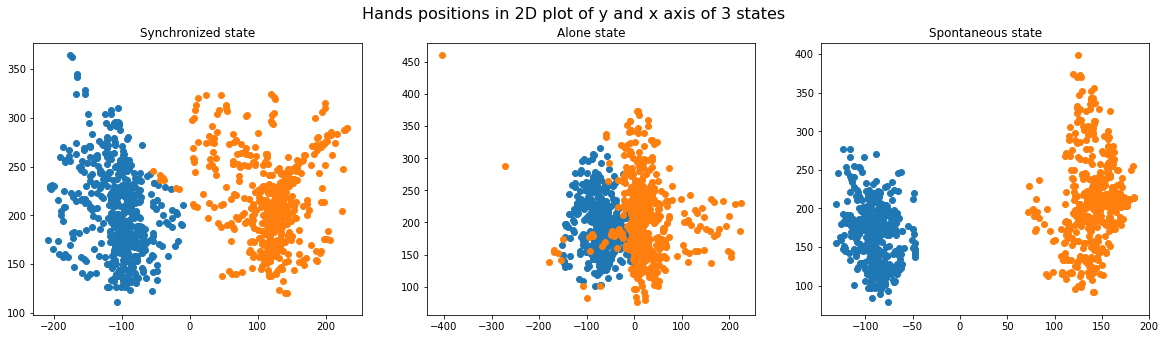

In [8]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
axs = np.atleast_2d(axs)
#plot alone state
df = pd.concat((data_sync[" Position X_x"], (data_sync[" Position Y_x"])), axis=1)
df = df.sample(500)
axs[0, 0].scatter(x= df[" Position X_x"], y = df[" Position Y_x"])
df = pd.concat((data_sync[" Position X_y"], data_sync[" Position Y_y"]), axis=1)
df = df.sample(500)
axs[0, 0].scatter(x= df[" Position X_y"], y = df[" Position Y_y"])
#plot alone state
df = pd.concat((data_alone[" Position X_x"], (data_alone[" Position Y_x"])), axis=1)
df = df.sample(500)
axs[0, 1].scatter(df[" Position X_x"], df[" Position Y_x"])
df = pd.concat((data_alone[" Position X_y"], (data_alone[" Position Y_y"])), axis=1)
df = df.sample(500)
axs[0, 1].scatter(df[" Position X_y"], df[" Position Y_y"])
#plot spontanously state
df = pd.concat((data_spontan[" Position X_x"], (data_spontan[" Position Y_x"])), axis=1)
df = df.sample(500)
axs[0, 2].scatter(df[" Position X_x"], df[" Position Y_x"])
df = pd.concat((data_spontan[" Position X_y"], (data_spontan[" Position Y_y"])), axis=1)
df = df.sample(500)
axs[0, 2].scatter(df[" Position X_y"], df[" Position Y_y"])

#add titles
axs[0, 0].set_title("Synchronized state")
axs[0, 1].set_title("Alone state")
axs[0, 2].set_title("Spontaneous state")
fig.suptitle("Hands positions in 2D plot of y and x axis of 3 states", fontsize=16)

Text(0.5, 0.98, 'Hands Grab movement with 3 modes in pie plot of 3 states')

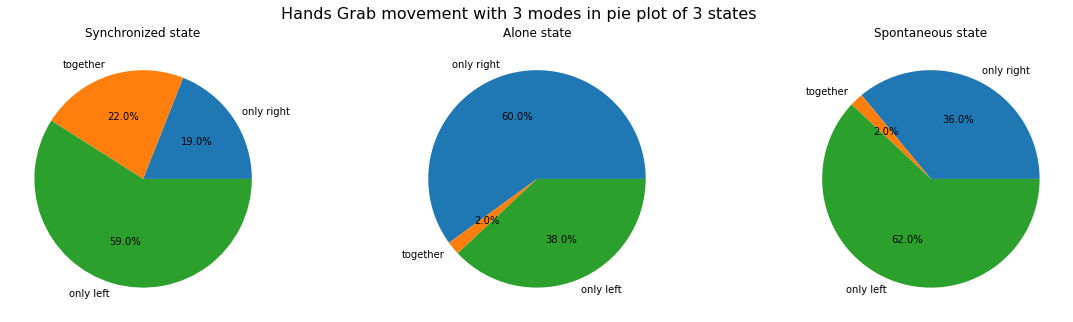

In [9]:
df_sync = data_sync[(data_sync[" Grab Strenth_x"] > 0.5) | (data_sync[" Grab Strenth_y"] > 0.5)]
df_sync = df_sync.sample(100, random_state = 42)
df_alone = data_alone[(data_alone[" Grab Strenth_x"] > 0.5) | (data_alone[" Grab Strenth_y"] > 0.5)]
df_alone = df_alone.sample(100,random_state = 42)
df_spontan = data_spontan[(data_spontan[" Grab Strenth_x"] > 0.5) | (data_spontan[" Grab Strenth_y"] > 0.5)]
df_spontan = df_spontan.sample(100,random_state = 42)
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
axs = np.atleast_2d(axs)
axs[0, 0].pie([df_sync[(df_sync[" Grab Strenth_x"] > 0.5) & (df_sync[" Grab Strenth_y"] <= 0.5)].shape[0],
              df_sync[(df_sync[" Grab Strenth_x"] > 0.5) & (df_sync[" Grab Strenth_y"] > 0.5)].shape[0],
              df_sync[(df_sync[" Grab Strenth_x"] <= 0.5) & (df_sync[" Grab Strenth_y"] > 0.5)].shape[0]],
               labels = ["only right", "together","only left"]
             ,autopct='%1.1f%%')
axs[0, 1].pie([df_alone[(df_alone[" Grab Strenth_x"] > 0.5) & (df_alone[" Grab Strenth_y"] <= 0.5)].shape[0],
              df_alone[(df_alone[" Grab Strenth_x"] > 0.5) & (df_alone[" Grab Strenth_y"] > 0.5)].shape[0],
              df_alone[(df_alone[" Grab Strenth_x"] <= 0.5) & (df_alone[" Grab Strenth_y"] > 0.5)].shape[0]],
              labels = ["only right", "together","only left"]
             ,autopct='%1.1f%%')
axs[0, 2].pie([df_spontan[(df_spontan[" Grab Strenth_x"] > 0.5) & (df_spontan[" Grab Strenth_y"] <= 0.5)].shape[0],
              df_spontan[(df_spontan[" Grab Strenth_x"] > 0.5) & (df_spontan[" Grab Strenth_y"] > 0.5)].shape[0],
              df_spontan[(df_spontan[" Grab Strenth_x"] <= 0.5) & (df_spontan[" Grab Strenth_y"] > 0.5)].shape[0]],
              labels = ["only right", "together","only left"]
              ,autopct='%1.1f%%')
#add titles
axs[0, 0].set_title("Synchronized state")
axs[0, 1].set_title("Alone state")
axs[0, 2].set_title("Spontaneous state")
fig.suptitle("Hands Grab movement with 3 modes in pie plot of 3 states", fontsize=16)

# Time Preprocessing

In [10]:
def my_time_preprocessor(df):
    #convert time column type into datetime
    df["Time"] = (df["Time"]).astype('float64')
    df["Time"] = pd.to_datetime(df['Time'], unit='s')
    #take every 250ms frame starting from 7 second from the start of the video
    df_resampler = df.resample('250ms', on="Time", loffset='7S').first()
    #merge 4 frames in second into one sample that contain them
    df_resampler_first = pd.DataFrame(df_resampler.groupby(pd.Grouper(freq='1S')).nth(0))
    df_resampler_second = pd.DataFrame(df_resampler.groupby(pd.Grouper(freq='1S')).nth(1))
    df_resampler_third = pd.DataFrame(df_resampler.groupby(pd.Grouper(freq='1S')).nth(2))
    df_resampler_fourth = pd.DataFrame(df_resampler.groupby(pd.Grouper(freq='1S')).nth(3))
    df = pd.concat((df_resampler_first, df_resampler_second, df_resampler_third, df_resampler_fourth), axis=1)
    df.dropna(inplace = True)
    df.drop(columns=["Time"], inplace = True)
    return df

In [11]:
# call the function
data_sync = my_time_preprocessor(data_sync)

In [12]:
data_sync

,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,Roll_x,Yaw_x,Wrist Pos X_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
Time,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:07:14,-87.18215,204.5752,-40.50642,171.17460,247.94530,-96.48488,1.239694,0.685550,1.220096,-137.3886,...,-0.951391,140.9991,217.5302,6.439684,296.7803,40.405940,82.04781,0.0,0.000000,0.0
1970-01-01 00:07:15,-117.58800,178.5896,58.59599,186.01890,-261.22000,-122.22110,0.999955,0.998588,0.971077,-165.3806,...,-1.971529,105.6721,198.5501,-13.126120,260.1699,24.835660,72.34061,0.0,0.000000,0.0
1970-01-01 00:07:16,-117.05650,283.6281,32.64002,-114.96110,-185.72220,123.92780,2.164774,1.206700,2.744123,-138.7826,...,-0.180096,152.7255,182.3740,52.492500,338.2286,61.735440,164.41860,0.0,0.000000,0.0
1970-01-01 00:07:17,-121.03110,252.9812,17.77844,113.51950,-367.16820,-94.54232,1.111643,1.873348,-0.294454,-120.3290,...,-2.146411,140.8444,201.9793,39.289380,321.8467,33.609700,58.84320,0.0,0.066630,0.0
1970-01-01 00:07:18,-102.56190,235.9444,83.56439,-13.53552,-203.30310,25.52142,1.843859,1.336432,2.557290,-122.2311,...,-0.358745,154.7552,169.1373,58.750620,361.3866,64.762680,147.64350,0.0,0.061282,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:08:24,-93.46594,161.8422,121.54770,15.47359,-19.69599,-14.18079,2.332740,1.063310,2.690518,-121.5807,...,-0.509804,141.5815,130.8651,92.279960,359.3033,36.204820,177.63730,0.0,0.202603,0.0
1970-01-01 00:08:25,-87.98711,193.7066,81.17018,45.19875,128.56950,191.53690,1.411798,1.184162,1.288743,-125.3363,...,-0.784922,151.2511,148.3919,108.152300,336.6041,-22.681320,113.39430,0.0,0.144886,0.0
1970-01-01 00:08:26,-97.15614,222.5027,51.44863,-90.75243,-273.17110,-139.33240,1.212731,1.499745,0.902079,-129.0448,...,-2.111303,155.0542,156.8977,123.465100,345.0584,-5.652042,89.92058,0.0,0.174466,0.0


In [13]:
def my_full_preprocessor(df, label):
    df = my_data_preprocessor(df, label)
    df = my_time_preprocessor(df)
    df["label"] = label
    return df.iloc[0: ((int)(df.shape[0]/3))*2], df.iloc[((int)(df.shape[0]/3))*2 + 4: df.shape[0]]
def my_full_preprocessor_without_split(df, label):
    df = my_data_preprocessor(df, label)
    df = my_time_preprocessor(df)
    df["label"] = label
    return df

#  Create Train And Test Dataset

In [14]:
#load Experimenters data
#load Evyatar data
data_sync_evyatar = pd.read_csv("data/extraFiles/Training/Evyatar Cohen/Evyatar636771053639929594Sync.csv")
data_alone_evyatar = pd.read_csv("data/extraFiles/Training/Evyatar Cohen/Evyatar636771054555711409Alone.csv")
data_spontan_evyatar = pd.read_csv("data/extraFiles/Training/Evyatar Cohen/Evyatar636771052727603804Spontan.csv")
#load Nofar data
data_sync_nofar = pd.read_csv("data/extraFiles/Training/Nofar Social_Nuero/Nofar636759797397919664Sync.csv")
data_alone_nofar = pd.read_csv("data/extraFiles/Training/Nofar Social_Nuero/Nofar636759796290435160Alone.csv")
data_spontan_nofar = pd.read_csv("data/extraFiles/Training/Nofar Social_Nuero/Nofar636759795182793299Spontan.csv")
#load Oriya data
data_sync_oriya = pd.read_csv("data/extraFiles/Training/Oriya Social_Nuero/Oriya636759806131350399Sync.csv")
data_alone_oriya = pd.read_csv("data/extraFiles/Training/Oriya Social_Nuero/Oriya636759805268396661Alone.csv")
data_spontan_oriya = pd.read_csv("data/extraFiles/Training/Oriya Social_Nuero/Oriya636759804404113837Spontan.csv")
#load Orya data
data_sync_orya = pd.read_csv("data/extraFiles/Training/Orya Kalmanovitz/OryaB636771084494502229Sync.csv")
data_alone_orya = pd.read_csv("data/extraFiles/Training/Orya Kalmanovitz/OryaB636771082736601528Alone.csv")
data_spontan_orya = pd.read_csv("data/extraFiles/Training/Orya Kalmanovitz/OryaB636771083605535985Spontan.csv")
#load Revital data
data_sync_revital = pd.read_csv("data/extraFiles/Training/Revital Marbel/Revital636770957894370062Sync.csv")
data_alone_revital = pd.read_csv("data/extraFiles/Training/Revital Marbel/Revital636770955999435879Alone.csv")
data_spontan_revital = pd.read_csv("data/extraFiles/Training/Revital Marbel/Revital636770957038873193Spontan.csv")
#load Shahar data
data_sync_shahar = pd.read_csv("data/extraFiles/Training/Shahar Terner/Sachar636771046527112972Sync.csv")
data_alone_shahar = pd.read_csv("data/extraFiles/Training/Shahar Terner/Sachar636771047408504303Alone.csv")
data_spontan_shahar = pd.read_csv("data/extraFiles/Training/Shahar Terner/Sachar636771045591258071Spontan.csv")
#load Shelly data
data_sync_shelly = pd.read_csv("data/extraFiles/Training/Shelly Social_Nuero/Shelly636759789526313406Sync.csv")
data_alone_shelly = pd.read_csv("data/extraFiles/Training/Shelly Social_Nuero/Shelly636759788383205274Alone.csv")
data_spontan_shelly = pd.read_csv("data/extraFiles/Training/Shelly Social_Nuero/Shelly636759787508979097Spontan.csv")
#load Yael data
data_sync_yael = pd.read_csv("data/extraFiles/Training/Yael Hagai/Yael636771060699529085Sync.csv")
data_alone_yael = pd.read_csv("data/extraFiles/Training/Yael Hagai/Yael636771061659067649Alone.csv")
data_spontan_yael = pd.read_csv("data/extraFiles/Training/Yael Hagai/Yael636771059544754823Spontan.csv")
#load Yoel data
data_sync_yoel = pd.read_csv("data/extraFiles/Training/Yoel Raz/Yoel636760923490742912Sync.csv")
data_alone_yoel = pd.read_csv("data/extraFiles/Training/Yoel Raz/Yoel636760922573364655Alone.csv")
data_spontan_yoel = pd.read_csv("data/extraFiles/Training/Yoel Raz/Yoel636760921663075813Spontan.csv")

In [15]:
train_test = my_full_preprocessor(data_sync_evyatar, 'sync')
train = train_test[0]
test = train_test[1]
train_test = my_full_preprocessor(data_alone_evyatar, 'alone')
train = pd.concat((train_test[0], train))
test = pd.concat((train_test[1], test))
train_test = my_full_preprocessor(data_spontan_evyatar, 'spontan')
train = pd.concat((train_test[0], train))
test = pd.concat((train_test[1], test))

train_test = my_full_preprocessor(data_sync_nofar, 'sync')
train = pd.concat((train_test[0], train))
test = pd.concat((train_test[1], test))
train_test = my_full_preprocessor(data_alone_nofar, 'alone')
train = pd.concat((train_test[0], train))
test = pd.concat((train_test[1], test))
train_test = my_full_preprocessor(data_spontan_nofar, 'spontan')
train = pd.concat((train_test[0], train))
test = pd.concat((train_test[1], test))

train_test = my_full_preprocessor(data_sync_oriya, 'sync')
train = pd.concat((train_test[0], train))
test = pd.concat((train_test[1], test))
train_test = my_full_preprocessor(data_alone_oriya, 'alone')
train = pd.concat((train_test[0], train))
test = pd.concat((train_test[1], test))
train_test = my_full_preprocessor(data_spontan_oriya, 'spontan')
train = pd.concat((train_test[0], train))
test = pd.concat((train_test[1], test))

train_test = my_full_preprocessor(data_sync_orya, 'sync')
train = pd.concat((train_test[0], train))
test = pd.concat((train_test[1], test))
train_test = my_full_preprocessor(data_alone_orya, 'alone')
train = pd.concat((train_test[0], train))
test = pd.concat((train_test[1], test))
train_test = my_full_preprocessor(data_spontan_orya, 'spontan')
train = pd.concat((train_test[0], train))
test = pd.concat((train_test[1], test))

train_test = my_full_preprocessor(data_sync_revital, 'sync')
train = pd.concat((train_test[0], train))
test = pd.concat((train_test[1], test))
train_test = my_full_preprocessor(data_alone_revital, 'alone')
train = pd.concat((train_test[0], train))
test = pd.concat((train_test[1], test))
train_test = my_full_preprocessor(data_spontan_revital, 'spontan')
train = pd.concat((train_test[0], train))
test = pd.concat((train_test[1], test))

train_test = my_full_preprocessor(data_sync_shahar, 'sync')
train = pd.concat((train_test[0], train))
test = pd.concat((train_test[1], test))
train_test = my_full_preprocessor(data_alone_shahar, 'alone')
train = pd.concat((train_test[0], train))
test = pd.concat((train_test[1], test))
train_test = my_full_preprocessor(data_spontan_shahar, 'spontan')
train = pd.concat((train_test[0], train))
test = pd.concat((train_test[1], test))

train_test = my_full_preprocessor(data_sync_shelly, 'sync')
train = pd.concat((train_test[0], train))
test = pd.concat((train_test[1], test))
train_test = my_full_preprocessor(data_alone_shelly, 'alone')
train = pd.concat((train_test[0], train))
test = pd.concat((train_test[1], test))
train_test = my_full_preprocessor(data_spontan_shelly, 'spontan')
train = pd.concat((train_test[0], train))
test = pd.concat((train_test[1], test))

train_test = my_full_preprocessor(data_sync_yael, 'sync')
train = pd.concat((train_test[0], train))
test = pd.concat((train_test[1], test))
train_test = my_full_preprocessor(data_alone_yael, 'alone')
train = pd.concat((train_test[0], train))
test = pd.concat((train_test[1], test))
train_test = my_full_preprocessor(data_spontan_yael, 'spontan')
train = pd.concat((train_test[0], train))
test = pd.concat((train_test[1], test))

train_test = my_full_preprocessor(data_sync_yoel, 'sync')
train = pd.concat((train_test[0], train))
test = pd.concat((train_test[1], test))
train_test = my_full_preprocessor(data_alone_yoel, 'alone')
train = pd.concat((train_test[0], train))
test = pd.concat((train_test[1], test))
train_test = my_full_preprocessor(data_spontan_yoel, 'spontan')
train = pd.concat((train_test[0], train))
test = pd.concat((train_test[1], test))


In [16]:
train

,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,Roll_x,Yaw_x,Wrist Pos X_x,...,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y,label
Time,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:10:06,-108.47640,186.9185,-13.207710,19.004510,-240.44500,8.428401,0.288154,0.333383,1.153908,-178.4995,...,247.2966,231.3078,91.77813,362.3346,-2.617062,79.31386,0.000000,0.095046,0.0,spontan
1970-01-01 00:10:07,-84.37640,157.7529,-16.001650,40.876340,101.10910,-1.073980,-0.083870,1.060395,0.971749,-149.3023,...,234.8433,222.7753,67.77802,355.4645,-4.833963,109.30650,0.000000,0.000000,0.0,spontan
1970-01-01 00:10:08,-86.54861,162.0182,1.115486,0.081437,13.54022,-87.166240,-0.069849,1.380052,1.073589,-153.3867,...,200.1658,188.1498,76.86211,381.3116,1.344015,96.09355,0.000000,0.148808,0.0,spontan
1970-01-01 00:10:09,-86.36156,173.9854,-0.339069,-19.513890,81.18513,21.752310,0.335313,0.713936,1.016876,-152.4429,...,188.0791,128.6700,111.94680,393.7862,22.335730,230.62000,0.000000,0.150630,0.0,spontan
1970-01-01 00:10:10,-99.73531,205.5756,16.160160,-150.626300,164.76620,-87.930370,0.855522,0.646775,1.127807,-161.5512,...,216.7414,270.4891,100.63300,345.9235,45.932770,122.95790,0.198364,1.001123,0.0,spontan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:07:59,-113.34670,203.7569,106.331900,26.536940,-581.40370,-134.011400,1.716545,1.244120,2.044944,-137.9483,...,282.5264,168.3735,89.97107,374.3544,-33.723520,205.94490,0.000000,0.497187,0.0,sync
1970-01-01 00:08:00,-188.54570,192.3499,80.891710,112.372100,-55.68646,2.127410,1.696095,0.732494,1.682185,-241.8826,...,265.7959,159.1854,61.17238,356.2141,41.175270,263.50350,0.000000,0.000000,0.0,sync
1970-01-01 00:08:01,-194.89190,179.2271,72.145350,-21.953890,-89.08156,-8.271159,1.615101,0.757587,1.612473,-247.4493,...,255.3031,148.8154,69.26842,410.0822,30.635590,227.66390,0.000000,0.162412,0.0,sync


In [17]:
#shuffling the train and test dataset
train = train.sample(frac=1, random_state=42)
test = test.sample(frac=1,random_state=42)

In [18]:
print(pd.Categorical(train["label"]))
#convert the target to number 0 - alone, 1 - spontan, 2 - sync
train["label"] = pd.Categorical(train["label"]).codes
test["label"] = pd.Categorical(test["label"]).codes
#split features and target 
y_train = train['label']
x_train = train.drop(columns = ['label'])
y_test = test['label']
x_test = test.drop(columns = ['label'])

[sync, alone, sync, alone, sync, ..., alone, sync, sync, spontan, sync]
Length: 1282
Categories (3, object): [alone, spontan, sync]


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
preprocessing = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.95)),
    ("norm", Normalizer(norm = "max"))
])

In [20]:
x_train = preprocessing.fit_transform(x_train)
x_test = preprocessing.transform(x_test)

# Models Training

Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
forest_clf = RandomForestClassifier()
cv_method = KFold(n_splits=4, shuffle=True, random_state=101)
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}
grid_search_forest_clf = RandomizedSearchCV(estimator = forest_clf,param_distributions = random_grid, cv = cv_method, scoring='accuracy')
grid_search_forest_clf.fit(x_train, y_train)
y_pred = grid_search_forest_clf.predict(x_test)
print("The best parameters of random forest:", grid_search_forest_clf.best_params_)
print("The accuracy of random forest: ",accuracy_score(y_test, y_pred))

The best parameters of random forest: {'n_estimators': 130, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': True}
The accuracy of random forest:  0.9265232974910395


xgboost

In [22]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
xgb_clf = xgb.XGBClassifier(eval_metric='mlogloss', objective="multi:softmax")
parameters = {'eval_metric': ['mlogloss'], 'objective': ['multi:softmax'], 'max_depth':[3, 5, 7 ], 'n_estimators':[200,500,100]}
grid_search_xgb = GridSearchCV(xgb_clf, parameters, cv = cv_method,scoring='accuracy')
grid_search_xgb.fit(x_train, y_train)
y_pred = grid_search_xgb.predict(x_test)
print("The best parameters of xgboost:", grid_search_xgb.best_params_)
print("The accuracy of xgboost: ",accuracy_score(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

The best parameters of xgboost: {'eval_metric': 'mlogloss', 'max_depth': 3, 'n_estimators': 500, 'objective': 'multi:softmax'}
The accuracy of xgboost:  0.9193548387096774


In [23]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier()
parameters = {"algorithm":["SAMME", "SAMME.R"], 'n_estimators':[10,50,100,200], "learning_rate": [0.1,0.2,0.3,0.5,1]}
grid_search_adaboost = GridSearchCV(ada_clf, parameters, cv = cv_method, scoring='accuracy')
grid_search_adaboost.fit(x_train, y_train)
y_pred = grid_search_adaboost.predict(x_test)
print("The best parameters of adaboost:", grid_search_adaboost.best_params_)
print("The accuracy of adaboost: ",accuracy_score(y_test, y_pred))

The best parameters of adaboost: {'algorithm': 'SAMME', 'learning_rate': 0.3, 'n_estimators': 50}
The accuracy of adaboost:  0.8351254480286738


In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf =  KNeighborsClassifier()
random_grid = {
    'n_neighbors': (1,10, 15),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')}
grid_search_knn_clf = RandomizedSearchCV(estimator = knn_clf,param_distributions = random_grid, cv = cv_method, scoring='accuracy')
grid_search_knn_clf.fit(x_train, y_train)
y_pred = grid_search_knn_clf.predict(x_test)
print("The best parameters of adaboost:", grid_search_knn_clf.best_params_)
print("The accuracy of adaboost: ",accuracy_score(y_test, y_pred))

The best parameters of adaboost: {'weights': 'uniform', 'p': 2, 'n_neighbors': 10, 'metric': 'minkowski', 'leaf_size': 40}
The accuracy of adaboost:  0.8853046594982079


In [25]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
estimators = [
        ('rf', RandomForestClassifier(**grid_search_forest_clf.best_params_)),
        ('xgb', xgb.XGBClassifier(**grid_search_xgb.best_params_)),
        ('ada',  AdaBoostClassifier(**grid_search_adaboost.best_params_)),
        ('knn', KNeighborsClassifier(**grid_search_knn_clf.best_params_))] 
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("The accuracy of stacking : ",accuracy_score(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

The accuracy of stacking :  0.9265232974910395


# Data Evaluating

In [31]:
#load Experimenters data
#load Itiel data
data_sync_itiel = pd.read_csv("data/extraFiles/Validation/Itiel Lab/Itiel636770941638547912Sync.csv")
data_alone_itiel = pd.read_csv("data/extraFiles/Validation/Itiel Lab/Itiel636770942529041679Alone.csv")
data_spontan_itiel = pd.read_csv("data/extraFiles/Validation/Itiel Lab/Itiel636770940701219076Spontan.csv")
#load Mor data
data_sync_mor = pd.read_csv("data/extraFiles/Validation/Mor SHerman/Mor636771065531910215Sync.csv")
data_alone_mor = pd.read_csv("data/extraFiles/Validation/Mor SHerman/Mor636771066407626524Alone.csv")
data_spontan_mor = pd.read_csv("data/extraFiles/Validation/Mor SHerman/Mor636771064635567065Spontan.csv")
#load Oded data
data_sync_oded = pd.read_csv("data/extraFiles/Validation/Oded Medina/Oded636754671560850581Sync.csv")
data_alone_oded = pd.read_csv("data/extraFiles/Validation/Oded Medina/Oded636754669540564461Alone.csv")
data_spontan_oded = pd.read_csv("data/extraFiles/Validation/Oded Medina/Oded636754670490266956Spontan.csv")

data_sync_itiel = my_full_preprocessor_without_split(data_sync_itiel, "sync")
data_alone_itiel = my_full_preprocessor_without_split(data_alone_itiel, "alone")
data_spontan_itiel = my_full_preprocessor_without_split(data_spontan_itiel, "spontan")

data_sync_mor = my_full_preprocessor_without_split(data_sync_mor, "sync")
data_alone_mor = my_full_preprocessor_without_split(data_alone_mor, "alone")
data_spontan_mor = my_full_preprocessor_without_split(data_spontan_mor, "spontan")

data_sync_oded = my_full_preprocessor_without_split(data_sync_oded, "sync")
data_alone_oded = my_full_preprocessor_without_split(data_alone_oded, "alone")
data_spontan_oded = my_full_preprocessor_without_split(data_spontan_oded, "spontan")

validate_test = pd.concat((data_sync_itiel, data_alone_itiel, data_spontan_itiel, data_sync_mor, data_alone_mor,
                           data_spontan_mor, data_sync_oded, data_alone_oded, data_spontan_oded))

In [32]:
validate_test = validate_test.sample(frac=1,random_state=42)
#convert the target to number 0 - alone, 1 - spontan, 2 - sync
validate_test["label"] = pd.Categorical(validate_test["label"]).codes
#split features and target 
y_validate_test = validate_test['label']
x_validate_test = validate_test.drop(columns = ['label'])

In [33]:
x_validate_test = preprocessing.transform(x_validate_test)

In [34]:
y_pred = clf.predict(x_validate_test)
print("The final accuracy score :" ,accuracy_score(y_validate_test, y_pred))

The final accuracy score : 0.8938461538461538


array([0, 1, 2], dtype=int8)

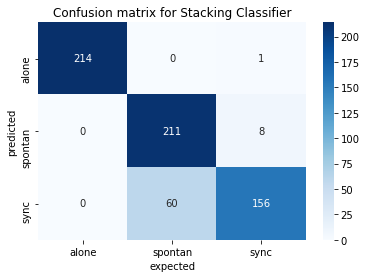

In [35]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
class_names = ['alone', 'spontan', 'sync']
cm = confusion_matrix(y_validate_test, y_pred)
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
ax = sns.heatmap(df_cm, cmap="Blues", annot=True,  fmt="d")
ax.set_title('Confusion matrix for Stacking Classifier')
ax.set_xlabel("expected")
ax.set_ylabel("predicted")
np.unique(y_train)